# Data Analysis Project: Fandango Movie Ratings

In this project, we want to determine wether the displayed ratings on <a href="https://www.fandango.com/">fandango.com</a> actually represent the internal ratings. <a href="https://fivethirtyeight.com/features/fandango-movies-ratings/">The data journalist Walt Hickey showed</a>, that the displayed ratings were inflated by being rounded up. Since then Fandango has claimed the reason for this was a bug. In this project, we want to analyze if the ratings have been corrected.
We will compare the <a href="https://github.com/fivethirtyeight/data/tree/master/fandango">data Walt Hickey used</a> with <a href="https://github.com/mircealex/Movie_ratings_2016_17">a more recent data set</a>.

### 1. Import Data and Libraries

First, we import all libraries and data sets we will use. We get a first impression by looking at the top rows of each set.



In [292]:
import pandas as pd
import numpy as np
%matplotlib inline


data1 = pd.read_csv("fandango_score_comparison.csv")
data2 = pd.read_csv("movie_ratings_16_17.csv")
print(data1.head(), "\b")
print(data2.head())

                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm         ...           IMDB_norm  RT_norm_round  \
0     3.70 

### 2. Understanding the Data

The population of interest includes all rated movies on the fadango.com. Our two data set represent two samples of this population taken at a different time. We want to make sure, that these samples are represantative of the data.
The requirements for Hickey's data set were, that a movie needed to have 30+ ratings at the time of sampling (24.9.2015) and tickets needed to be available at that time aswell. Therefor the sample is not random but tied to conditions. 
The conditions for the second sample were: The movie must have been released in 2016 or earlier and it must have had a considerable amount of ratings and reviews.
We can assume, that the samples are not representative of the whole population. The goal of our project gets a slight adjustment: We want to find out, if the rating of 2016's most popular movies had a less significant bias towards positive ratings than the rating of 2015's most popular movie on fandango.com

### 3. Selecting relevant columns

Now we want to prepare the two data sets for the analysis. We want to select only the columns that contain relevant information. 

Data Set 1:
* FILM: The name of the movie
* Fandango_Stars: The number of stars the film had on its Fandango movie page
* Fandango_Ratingvalue: The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
* Fandango_votes: The number of user votes the film had on Fandango
* Fandango_Difference: The difference between the presented Fandango_Stars and the actual Fandango_Ratingvalue

Data Set 2:
* movie: The name of the movie
* year: The release year of the movie
* fandango: The Fandango rating of the movie (user score)

In [293]:
cols1 = ["FILM", "Fandango_Stars", "Fandango_Ratingvalue", "Fandango_votes", "Fandango_Difference"]
cols2 = ["movie", "year", "fandango"]
data1 = data1[cols1]
data2 = data2[cols2]

### 4. Tailoring the Data Set

The two conditions for our samples are: 
1. Year released (2015/2016)
2. Number of ratings (30+)

We will select only rows, that fulfill these conditions. However, the second data set doesn't specify the number of ratings. We will take a random sample and check manually if at least 8 of 10 of those movies have 30+ ratings and the sample therefor can be representative for popular movies.

In [294]:
movies2015 = data1["FILM"].str.contains(r"(2015)")
data1 = data1[movies2015]
data2 = data2[data2["year"] == 2016]
print(data1["Fandango_votes"].sort_values())
sample = data2.sample(10)
print(sample)

39        35
122       36
71        38
43        38
145       41
70        41
32        42
42        43
38        43
31        46
110       48
139       50
121       51
30        54
64        55
37        56
144       59
109       63
120       66
119       70
41        74
36        79
95        83
108       83
87        95
127       99
94       110
29       121
118      124
117      127
       ...  
90      4493
50      4577
99      4933
17      5597
98      5933
49      6272
48      6288
16      6437
125     6506
15      6757
46      7123
124     7705
45      8077
76      8096
128     8357
24      8381
123     9363
89      9418
75      9749
88     10509
2      12055
1      12640
0      14846
131    14998
44     15205
140    15749
73     33538
72     34085
130    34390
97     34846
Name: Fandango_votes, Length: 129, dtype: int64
                                  movie  year  fandango
140        Rogue One: A Star Wars Story  2016       4.5
92             Kubo and the Two Strings  2016  

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



* Gods of Egypt: 31,774
* Why Him?: 22,300
* Assasin's Creed: 57,380
* I.T.: 782
* Zootopia: 101,291
* Bleed fo This: 8,835
* Jason Bourne: 56,818
* Central Intelligence: 54,312
* Me Before You: 30,626
* Eddie the Eagle: 22,853

The sample suggests, that our data set is representative of popular movies. 


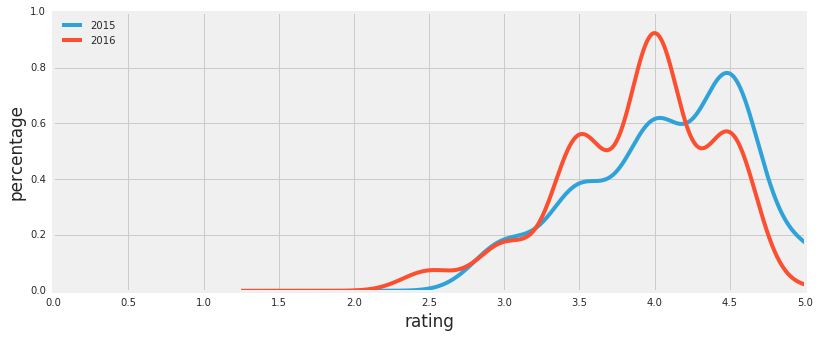

In [295]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(12,5))
plt.style.use('fivethirtyeight')
ax1 = data1["Fandango_Stars"].plot.kde(label="2015")
ax2 = data2["fandango"].plot.kde(label="2016")
ax1.set_xticks([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]) 
plt.xlim(0,5)
plt.xlabel("rating")
plt.ylabel("percentage")

plt.legend(loc="upper left")



We can see on the Kernel Density Plot, that the ratings for 2016 movies are actually lower than the ratings for 2015 movies.
There were no ratings below 3.0 in 2015, but there are some 2.5 ratings in 2016. There are also less 4.5 or higher rated movies in 2016, but the amount of 3.5 and 4.0 has increased. Now we want to properly look at the numbers to see, how ratings have changed.

In [296]:
proportions2015 = round(data1["Fandango_Stars"].value_counts(normalize = True), 2).sort_values()
proportions2016 = round(data2["fandango"].value_counts(normalize = True), 2).sort_values()
print("2015:\n",proportions2015, "\n2016:\n", proportions2016)
mean15 = data1["Fandango_Stars"].mean()
median15 = data1["Fandango_Stars"].median()
mode15 = data1["Fandango_Stars"].mode()
mean16 = data2["fandango"].mean()
median16 = data2["fandango"].median()
mode16 = data2["fandango"].mode()

print("\n2015\nMean:", mean15, "\nMedian:", median15, "\nMode:", mode15, "\n2016:\nMean:", mean16, "\nMedian:", median16, "\nMode:", mode16)

    

2015:
 5.0    0.07
3.0    0.09
3.5    0.18
4.0    0.29
4.5    0.38
Name: Fandango_Stars, dtype: float64 
2016:
 5.0    0.01
2.5    0.03
3.0    0.07
3.5    0.24
4.5    0.25
4.0    0.40
Name: fandango, dtype: float64

2015
Mean: 4.0852713178294575 
Median: 4.0 
Mode: 0    4.5
dtype: float64 
2016:
Mean: 3.887434554973822 
Median: 4.0 
Mode: 0    4.0
dtype: float64


In 2015 4.5 Stars was the most common rating (38 %), which decreased by 14 percent points to 25 %. The second most common rating was 4.0 Stars (29 %), which increased by 11 percent points to 40 % in 2016.

The average rating changed from 4.08 to 3.89. The median is 4.0 for both distributions, but the Mode changed from 4.5 to 4.0.



In [297]:
summary = pd.DataFrame()
summary["2015"] = [mean15, median15, mode15]
summary["2016"] = [mean16, median16, mode16]
summary.index = ["mean", "median", "mode"]

print(summary["2015"])
summary["2015"].plot.bar()
summary["2016"].plot.bar()
# plt.show()

0                    4.08527
1                          4
2    0    4.5
dtype: float64
Name: 2015, dtype: object


TypeError: Empty 'DataFrame': no numeric data to plot